In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/data/data_mango.zip

Archive:  /content/drive/MyDrive/data/data_mango.zip
   creating: data_mango/
   creating: data_mango/Anthracnose/
  inflating: data_mango/Anthracnose/20211008_124249 (Custom).jpg  
  inflating: data_mango/Anthracnose/20211008_124250 (Custom).jpg  
  inflating: data_mango/Anthracnose/20211008_124252 (Custom).jpg  
  inflating: data_mango/Anthracnose/20211008_124253 (Custom).jpg  
  inflating: data_mango/Anthracnose/20211008_124256 (Custom).jpg  
  inflating: data_mango/Anthracnose/20211008_124301 (Custom).jpg  
  inflating: data_mango/Anthracnose/20211008_124302 (Custom).jpg  
  inflating: data_mango/Anthracnose/20211008_124305 (Custom).jpg  
  inflating: data_mango/Anthracnose/20211008_124306 (Custom).jpg  
  inflating: data_mango/Anthracnose/20211008_124310 (Custom).jpg  
  inflating: data_mango/Anthracnose/20211008_124312 (Custom).jpg  
  inflating: data_mango/Anthracnose/20211008_124334 (Custom).jpg  
  inflating: data_mango/Anthracnose/20211008_124336 (Custom).jpg  
  inflating: d

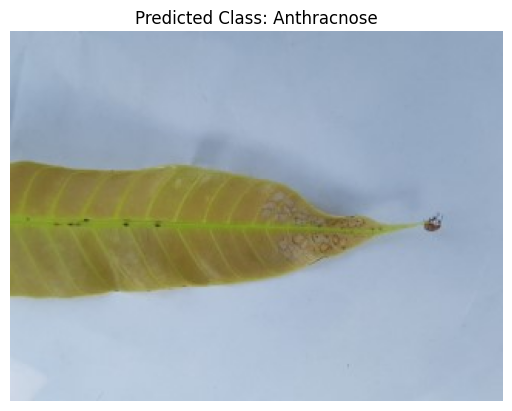

Predicted class name: Anthracnose
0.63875


In [4]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Function to load and preprocess images
def load_data(folder_path, target_size):
    images = []
    labels = []
    for disease_folder in os.listdir(folder_path):
        for image_name in os.listdir(os.path.join(folder_path, disease_folder)):
            image_path = os.path.join(folder_path, disease_folder, image_name)
            image = cv2.imread(image_path)
            # Resize the image to a fixed size
            image = cv2.resize(image, target_size)
            images.append(image)
            labels.append(disease_folder)
    return images, labels

# Function to preprocess a single image
def preprocess_image(image_path, target_size):
    image = cv2.imread(image_path)
    image = cv2.resize(image, target_size)
    return image.flatten()

# Set folder path
folder_path = "data_mango"

# Set target image size
target_size = (100, 100)  # Adjust this according to your preference

# Load and preprocess images
images, labels = load_data(folder_path, target_size)

# Convert images and labels to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Flatten the images
images = images.reshape(images.shape[0], -1)

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

# Train a k-Nearest Neighbors classifier
k = 5  # Number of neighbors
classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Upload and predict the class name of an image
uploaded_image_path = "/content/Anthracnose.jpg"  # Replace with the path to your uploaded image

# Preprocess the uploaded image
preprocessed_image = preprocess_image(uploaded_image_path, target_size)

# Predict the class label of the uploaded image
predicted_label = classifier.predict([preprocessed_image])[0]

# Decode the predicted label
predicted_class_name = label_encoder.inverse_transform([predicted_label])[0]

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Display the uploaded image
uploaded_image = mpimg.imread(uploaded_image_path)
plt.imshow(uploaded_image)
plt.title("Predicted Class: " + predicted_class_name)
plt.axis('off')  # Turn off axis labels
plt.show()

print("Predicted class name:", predicted_class_name)
print(accuracy)
